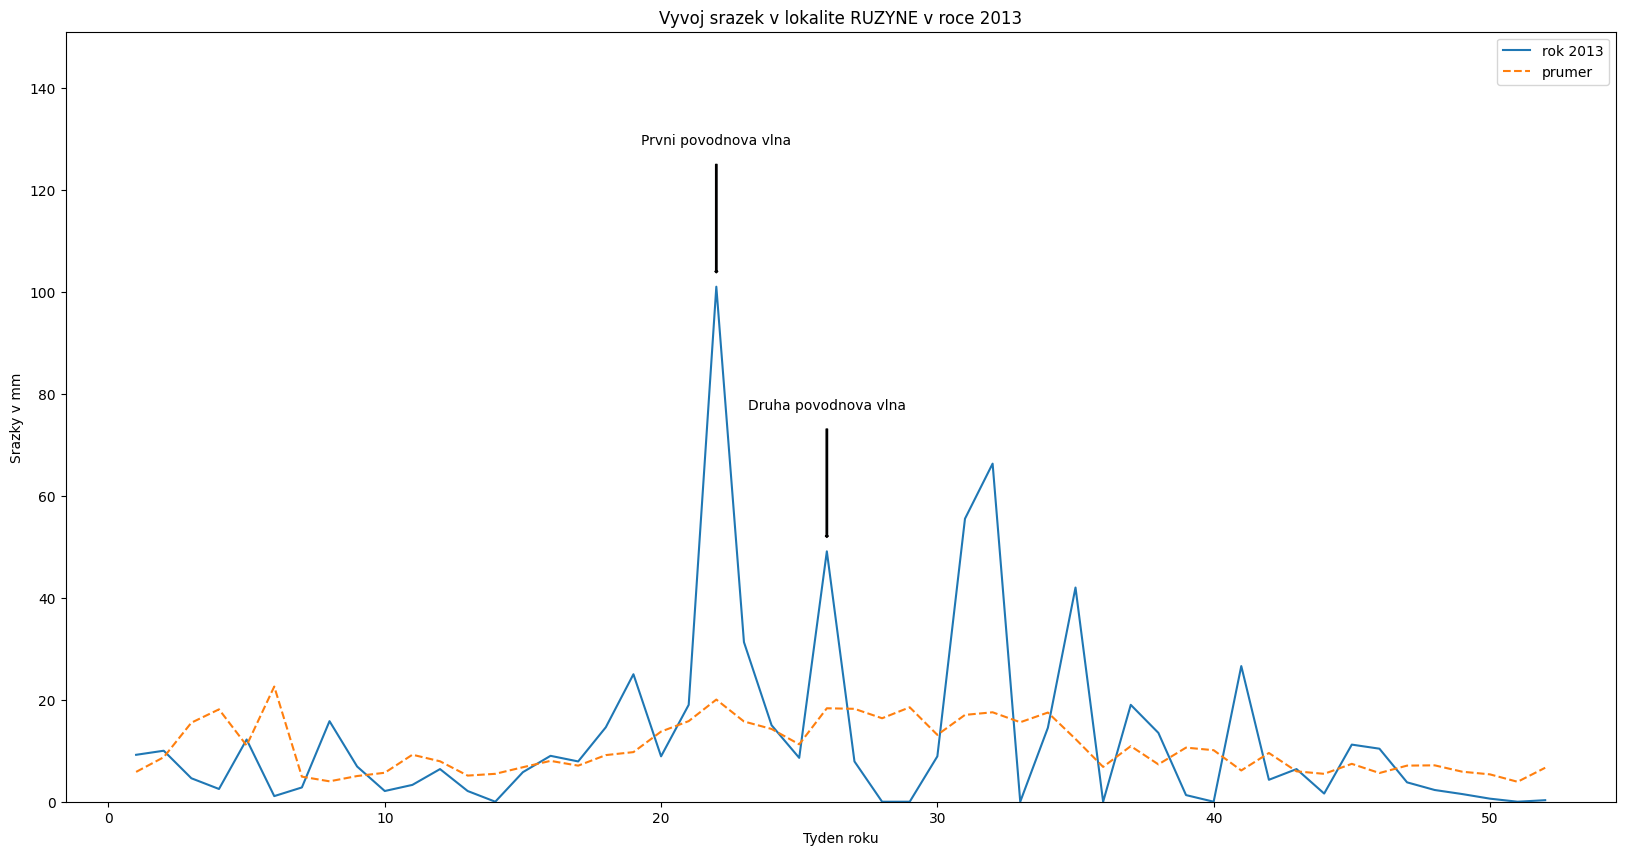

In [7]:
# Import potrebnych knihoven
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(20,10))

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df = df.loc[df['NAME']== 'RUZYNE'][['DATE','PRCP']]
df['DATE']  = pd.to_datetime(df['DATE'])
df['MESIC'] = df['DATE'].dt.month
df['ROK'] = df['DATE'].dt.year
df['TYDEN'] = df['DATE'].dt.isocalendar().week
df['DATUM'] = df['DATE'].dt.strftime('%Y/%m')

df2 = df.copy()

df = df.loc[df['ROK']== 2013]
df = df.groupby('TYDEN',as_index=False)['PRCP'].sum()



df2 = df2.groupby(by=['ROK','TYDEN'],as_index=False)['PRCP'].sum()
df2 = df2.groupby(by=['TYDEN'],as_index=False)['PRCP'].mean()
df2 = df2[df2['TYDEN']<53]


popisky=[(22,'Prvni povodnova vlna'),(26,'Druha povodnova vlna')]

ax.plot(df['TYDEN'],df['PRCP'])

ax.set_xlabel('Tyden roku')
ax.set_ylabel('Srazky v mm')
ax.set_ylim([0,df['PRCP'].max()+50])
ax.set_title('Vyvoj srazek v lokalite RUZYNE v roce 2013')
ax.plot(df['TYDEN'],df2['PRCP'],'--')
ax.legend(['rok 2013','prumer'])

for tyden,popisek in popisky:

    ax.annotate(popisek,xy=(tyden
                            ,df[df['TYDEN']==tyden]['PRCP'])
                            ,xytext=(tyden,df[df['TYDEN']==tyden]['PRCP']+30)
                            ,size=10
                            ,horizontalalignment="center"
                            ,verticalalignment="top"
                            ,arrowprops=dict(facecolor="red", headwidth=2, width=1,headlength=1,shrink=0.1))

plt.show()


In [3]:
# # Stazeni .csv souboru publikovaneho na github.com
# fig = plt.figure()
# url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
# df = pd.read_csv(url,delimiter = ';')
# # Filtrovani dataframe (je vysvetleno pozdeji)

# df = df.loc[df['NAME']== 'RUZYNE'][['DATE','PRCP']]
# df['DATE']  = pd.to_datetime(df['DATE'])
# df['MESIC'] = df['DATE'].dt.month
# df['ROK'] = df['DATE'].dt.year
# df['TYDEN'] = df['DATE'].dt.isocalendar().week
# df['DATUM'] = df['DATE'].dt.strftime('%Y/%m')
# df = df.loc[df['ROK']== 2013]
# df = df.groupby('MESIC',as_index=False)['PRCP'].sum()
# plt.figure(figsize=(50,20))

# plt.plot(df['MESIC'],df['PRCP'])

# #df.plot(kind='bar',x='MESIC',y='PRCP',figsize=(20,8),legend=False)
# plt.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
# plt.set_xticklabels(['leden','unor','brezen','duben','kveten','cerven','cervenec','srpen','zari','rijen','listopad','prosinec'],rotation='vertical')


# plt.show()

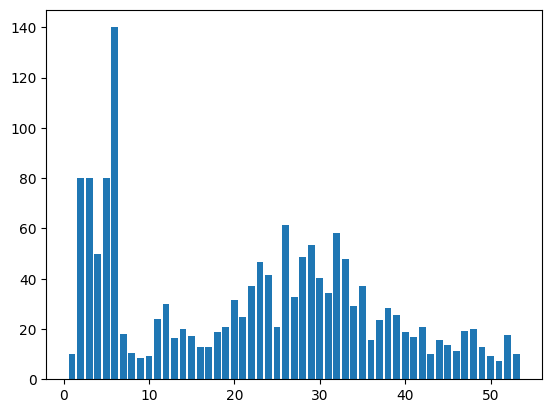

In [4]:
from matplotlib import pyplot as plt
import pandas as pd

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df = df.loc[df['NAME']== 'RUZYNE'][['DATE','PRCP']]
df['DATE']  = pd.to_datetime(df['DATE'])
df['MESIC'] = df['DATE'].dt.month
df['ROK'] = df['DATE'].dt.year
df['TYDEN'] = df['DATE'].dt.isocalendar().week
df['DATUM'] = df['DATE'].dt.strftime('%Y/%m')

df2 = df.copy()
df2 = df2.groupby(by=['ROK','TYDEN'],as_index=False)['PRCP'].sum()
df2 = df2.groupby(by=['TYDEN'],as_index=False)['PRCP'].mean()
df2 = df2[df2['TYDEN']<53]
plt.bar(df['TYDEN'],df['PRCP'])
plt.rcParams['figure.figsize'] = (30,20)
plt.show()

In [5]:
from matplotlib import pyplot as plt
import pandas as pd

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df = df.loc[df['NAME']== 'RUZYNE'][['DATE','PRCP']]
df['DATE']  = pd.to_datetime(df['DATE'])
df.reset_index(inplace=True)

#df.iloc[:100][df.PRCP.notna()]
df.PRCP.notna()

0       False
1       False
2        True
3       False
4       False
        ...  
7596     True
7597     True
7598     True
7599     True
7600     True
Name: PRCP, Length: 7601, dtype: bool